In [1]:
#Goal:Data need to make ready for training model and visualization
#to do this, all value in df need to be numerical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# import the data and reading in pandas df
#you can also define first row should be header(header=0) in read_csv function
# you can also define specific column will be decimal (dtype={'Age': np.float64})
df=pd.read_csv("/Users/myyntiimac/Desktop/Naresh it data /7th,8th/TASK-13/DATASET/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Lets do some analysis and see the data well
df.shape

(891, 12)

we see we have 891 rows and 12 columns
Lets see what are the column name and undestand the independent and dependent variable

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In 12 coulmn with data column description analysi, survived will be dependent and all others independent.
AS our dependent variable is binary , this dataset problem will be classification prediction.In addition , there is some attribute like passnger name and Ticket attribute have no effrct on survived, so we can delete it.
And the variable which we not sure about their effect we need to check

In [5]:
#First delet irrevelent coulmn
del df["Name"]
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# similarly ticket delete
del df["Ticket"]
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [7]:
del df["Fare"]
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,1,0,3,male,22.0,1,0,NaN,S
1,2,1,1,female,38.0,1,0,C85,C
2,3,1,3,female,26.0,0,0,NaN,S
3,4,1,1,female,35.0,1,0,C123,S
4,5,0,3,male,35.0,0,0,NaN,S


In [8]:
del df["Cabin"]
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [9]:
# now check the which column contain null value
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age             True
SibSp          False
Parch          False
Embarked        True
dtype: bool

we found two column age and Embarked contain the null value 
so first fill with null value. in Age attribute we can replace age null value in respective to survived and not survived 


In [10]:
#First find the means of age , people who  are srvived
mean_age_survived = df[df['Survived'] == 1]['Age'].mean()
mean_age_survived


28.343689655172415

In [11]:
# Fill the null values in the 'Age' column with the mean age for the people who are survived
#fill the mean value in place of null in age column where the conditinsmeet
df.loc[df['Survived'] == 1, 'Age'] = df.loc[df['Survived'] == 1, 'Age'].fillna("mean_age_survived")
print(df.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch Embarked
0            1         0       3    male  22.0      1      0        S
1            2         1       1  female  38.0      1      0        C
2            3         1       3  female  26.0      0      0        S
3            4         1       1  female  35.0      1      0        S
4            5         0       3    male  35.0      0      0        S


In [12]:
df['Age'].isnull().sum()

125

so in Age attribute , still 125 is null value which represent peole who are not survived 
Lets calculatae the mean  for them and fillna the missing value with mean


In [13]:
mean_age_unsurvived = df[df['Survived'] == 0]['Age'].mean()
mean_age_unsurvived

30.62617924528302

In [14]:
# Fill the null values in the 'Age' column with the mean age for the people who are unsurvived
#fill the mean value in place of null in age column where the conditinsmeet
df.Age.fillna(mean_age_unsurvived,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [15]:
df['Age'].isnull().sum()

0

In [16]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


but we have some null values in embarked column
this only 2 null values, so before deleting the total column or 2 null values row , check this attribute ahas any effect on survived by comparing each other

In [17]:
# Group the data by 'Embarked' and 'Survived' and count the occurrences
comparison = df.groupby(['Embarked', 'Survived']).size().reset_index(name='Count')

print(comparison)

  Embarked  Survived  Count
0        C         0     75
1        C         1     93
2        Q         0     47
3        Q         1     30
4        S         0    427
5        S         1    217


FRom this comparison we can see thereis differenc in survival in cmaring in different embarked location. 
So, its has affect on survival, in this case we dont delete entire attribute instead 2 rows

In [18]:
df.dropna(inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [19]:
df.shape

(889, 8)

In [20]:
# now treat the coulumn containing catagorical variable to numerical
# for this we define a function with condition statement and apply it to column and rename the column into new variable


In [21]:
def tina(str):
    if str=="S":
        return 1
    elif str=='Q':
        return 2
    else:
        return 3
df["Embark"]=df["Embarked"].apply(tina)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Embark
0,1,0,3,male,22.0,1,0,S,1
1,2,1,1,female,38.0,1,0,C,3
2,3,1,3,female,26.0,0,0,S,1
3,4,1,1,female,35.0,1,0,S,1
4,5,0,3,male,35.0,0,0,S,1


In [22]:
# now delete the old Embarked column
del df["Embarked"]
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embark
0,1,0,3,male,22.0,1,0,1
1,2,1,1,female,38.0,1,0,3
2,3,1,3,female,26.0,0,0,1
3,4,1,1,female,35.0,1,0,1
4,5,0,3,male,35.0,0,0,1


In [23]:
# now treat with sex column
# if it binary we can try other method

In [24]:
df['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embark
0,1,0,3,0,22.0,1,0,1
1,2,1,1,1,38.0,1,0,3
2,3,1,3,1,26.0,0,0,1
3,4,1,1,1,35.0,1,0,1
4,5,0,3,0,35.0,0,0,1


In [25]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Embark         False
dtype: bool

In [26]:
df['Sex'].isnull().sum()

0

In [27]:
print(df['Sex'].unique())


[0 1]


In [28]:
# now comparing males and females see in pie chart
# to see the value in pie chart we need the values and lebels
# so first need to sum how many male and female in our data
male_count = df['Sex'].value_counts()[0]
male_count

577

In [30]:
Female_count = df['Sex'].value_counts()[1]
Female_count

312

In [31]:
T=[male_count,Female_count]
T

[577, 312]

(-1.1568649521127876,
 1.1027078548625138,
 -1.1053537120253407,
 1.2124380585172787)

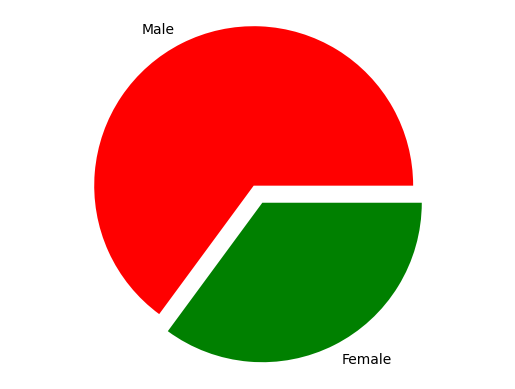

In [33]:
plt.pie(T,    
       labels = ['Male', 'Female'], 
       colors = ['red', 'green'],   
       explode = (0.12, 0),    #How much the gap should me there between the pies
       startangle = 0)  #what start angle should be given
plt.axis('equal')

In [34]:
# then group buy male female and survivived and unsuvived aand nmaking the graph
comparison1 = df.groupby(['Sex', 'Survived']).size().reset_index(name='Count')

print(comparison1)

   Sex  Survived  Count
0    0         0    468
1    0         1    109
2    1         0     81
3    1         1    231


In [40]:
MaleN=468
MaleS=109
FemaleN=81
FemaleS=231

In [43]:
comparison1=[MaleN,MaleS,FemaleN,FemaleS]


comparison1

[468, 109, 81, 231]

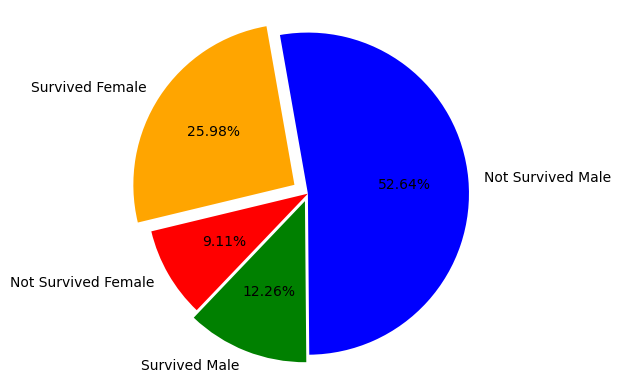

In [45]:
comparison1=[MaleN,MaleS,FemaleN,FemaleS]
colors=['blue','green','red','Orange']
labels=["Not Survived Male","Survived Male","Not Survived Female","Survived Female"]
explode=[0,0.05,0,0.1]
plt.pie(comparison1,labels=labels,colors=colors,explode=explode,startangle=100,counterclock=False,autopct="%.2f%%")
plt.axis("equal")
plt.show()